In [100]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.mosaicplot import mosaic

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Upload Data and First View

In [5]:
df = pd.read_csv('insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1], numeric_only=True).T)    
    print("##################### Describes Statistics #####################")
    print(dataframe.describe().T)

In [12]:
check_df(df)

##################### Shape #####################
(1338, 7)
##################### Types #####################
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
##################### Head #####################
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
##################### Tail #####################
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629

**Age**

Bu veri kümesindeki kişilerin yaşları 18 ile 64 arasında değişiyor. Yaş dağılımı ortalama olarak 39 yaşında bulunuyor. Medyan yaş ve ortalama yaş birbirine oldukça yakın, bu dağılımın simetrik olabileceğini gösteriyor.

**BMI**

BMI değerleri geniş bir aralıkta (15.96 ile 53.13) dağılıyor. Ortalama BMI değeri 30.66, bu da ortalamanın "obez" kategorisine denk geldiğini gösterir. Medyan ve ortalama BMI değerleri yakın, bu dağılımın sağa çarpık olabileceğini düşündürebilir.

**Children**

Bu veri kümesindeki kişilerin çocuk sayıları 0 ile 5 arasında değişiyor. Ortalama çocuk sayısı 1.09, yani genellikle her bir kişinin bir çocuğu olduğunu gösteriyor.

**Charges**

Tıbbi masraflar oldukça geniş bir aralıkta (1121.87 ile 63770.43) değişiyor. Ortalama ve medyan tıbbi masraf değerleri yakın, ancak standart sapma oldukça yüksek, bu dağılımın geniş olduğunu gösteriyor. Medyan değer, tıbbi masrafların merkezi eğilimini daha iyi yansıtabilir çünkü aşırı yüksek değerler ortalamayı etkileyebilir.

# EDA

## BMI

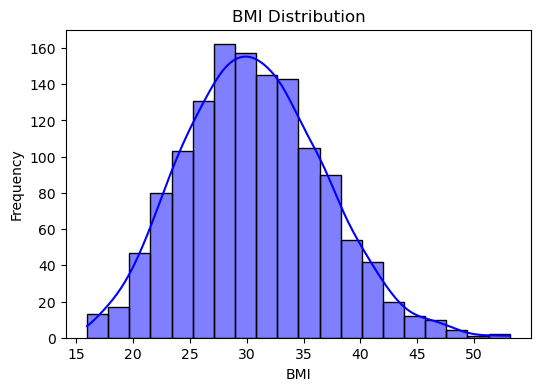

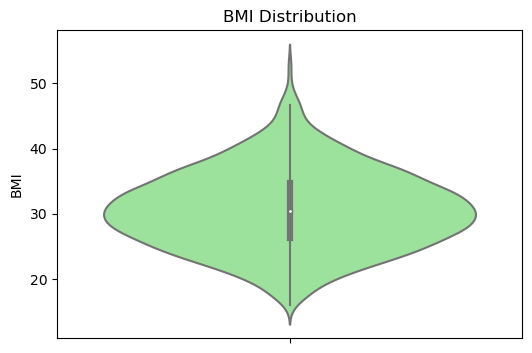

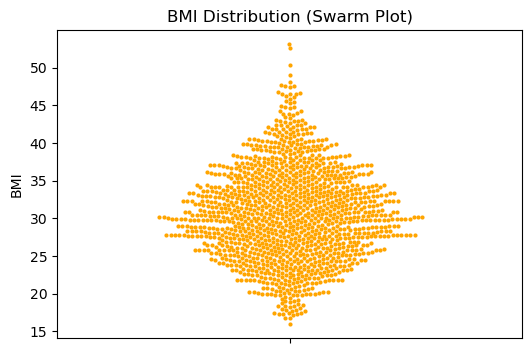

In [27]:
## BMI

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='bmi', bins=20, kde=True, color='blue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Violin
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, y='bmi', color='lightgreen')
plt.title('BMI Distribution')
plt.ylabel('BMI')
plt.show()

# Swarm
plt.figure(figsize=(6, 4))
sns.swarmplot(data=df, y='bmi', color='orange', size=3)  # Adjust size parameter
plt.title('BMI Distribution (Swarm Plot)')
plt.ylabel('BMI')
plt.show()

Dağılım 25 ile 35 arasında yoğundur.

## Smoker and Charges

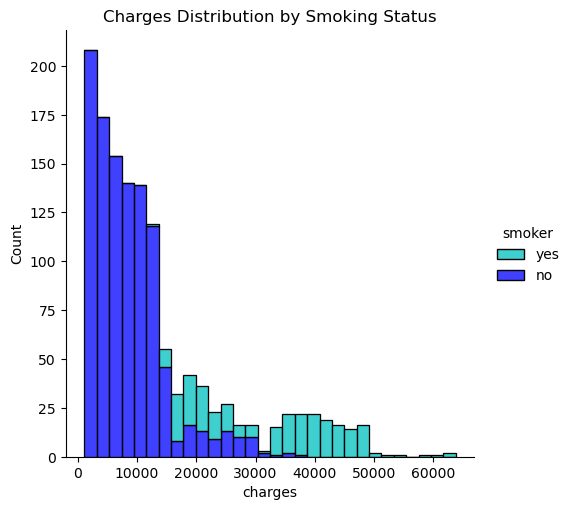

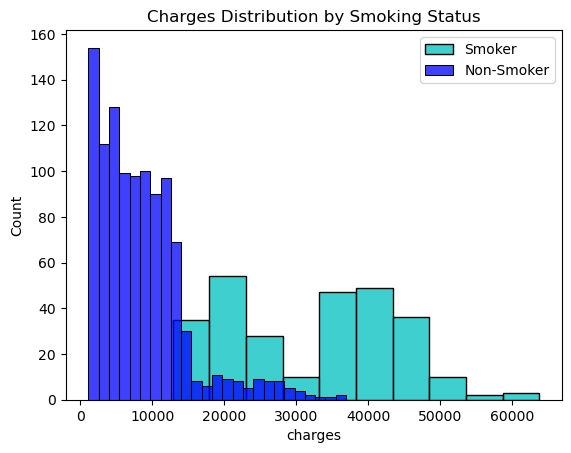

In [34]:
# Relationship between “smoker” and “charges”

g = sns.displot(data=df, x='charges', hue='smoker', kind='hist', multiple='stack', palette=['c', 'b'])
g.set(title='Charges Distribution by Smoking Status')
plt.show()

fig, ax = plt.subplots()
sns.histplot(data=df[df['smoker'] == 'yes'], x='charges', color='c', ax=ax, label='Smoker')
sns.histplot(data=df[df['smoker'] == 'no'], x='charges', color='b', ax=ax, label='Non-Smoker')
ax.set(title='Charges Distribution by Smoking Status')
ax.legend()
plt.show()

15000'e kadar olan tıbbi masraflar genellikle sigara içmeyenler olarak dağılmaktadır. 15000'den sonraki tıbbi masrafların dağılımında sigara içmeyenler azalarak yerini sigara içenlere bırakmaktadır. Sigara içenlerin tıbbi masrafının sigara içmeyenlere göre fazla olduğunu söyleyebiliriz.

## Smoker and Region

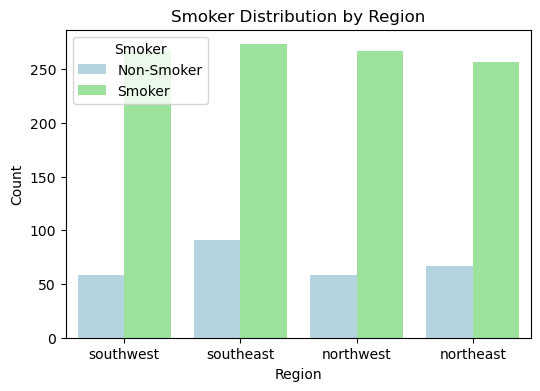

<Figure size 1000x600 with 0 Axes>

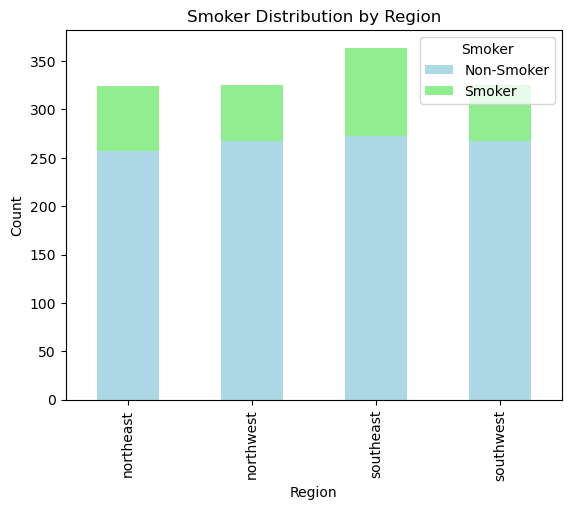

In [47]:
# Relationship between “smoker” and “region”.

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='region', hue='smoker', palette=['lightblue', 'lightgreen'])
plt.title('Smoker Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()


# Group the data by region and smoker status
grouped = df.groupby(['region', 'smoker']).size().unstack()

# Create a stacked bar plot to show smoker distribution by region
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Smoker Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

Southeast(Güneydoğu)'da sigara içenler de içmeyenler de diğer bölgelere göre fazla olsa da içen içmeyen durumunun birbiriyle önemli farkı olmadığı görünmektedir.

## BMI and Sex

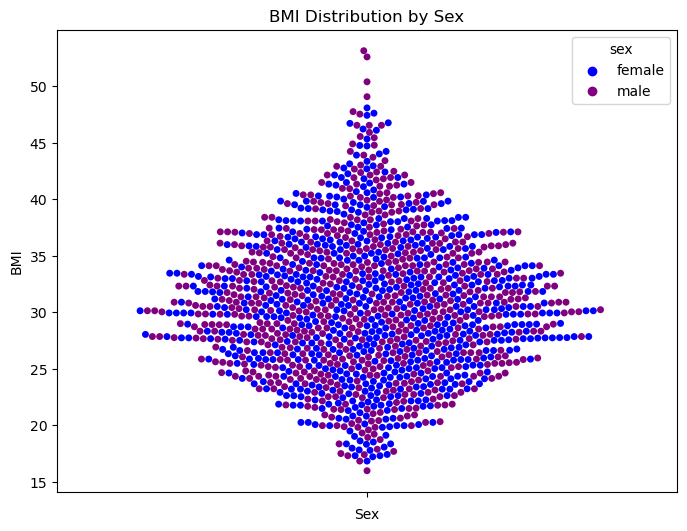

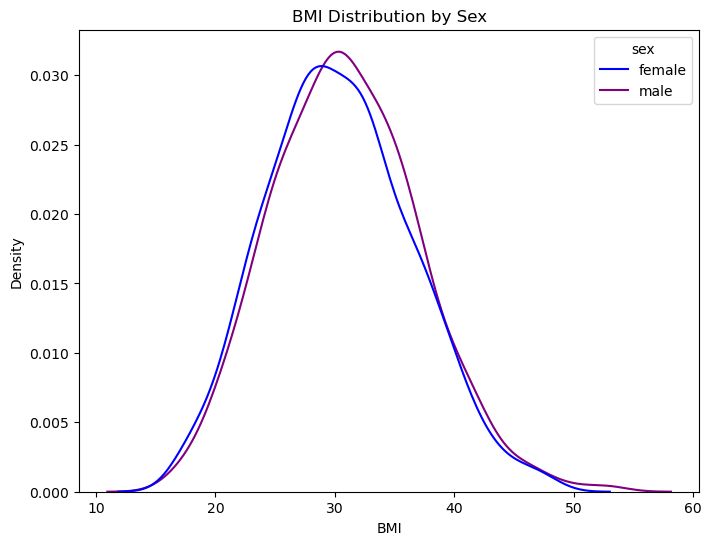

In [52]:
# Relationship between “bmi” and “sex”

plt.figure(figsize=(8, 6))
sns.swarmplot(data=df, hue='sex', y='bmi', palette=['blue', 'purple'])
plt.title('BMI Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='bmi', hue='sex', palette=['blue', 'purple'])
plt.title('BMI Distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

Kadınların vücut kitle indeksi erkeklere göre daha azdır. Erkeklerde obezlik kadınlara göre daha çok dağılır.

## Most children by region

In [54]:
# Group the data by "region" and sum up the "children" values
children_by_region = df.groupby('region')['children'].sum()

# Find the region with the most children
region_with_most_children = children_by_region.idxmax()
most_children_count = children_by_region.max()

print(f"The region with the most children is '{region_with_most_children}' with {most_children_count} children.")

The region with the most children is 'southeast' with 382 children.


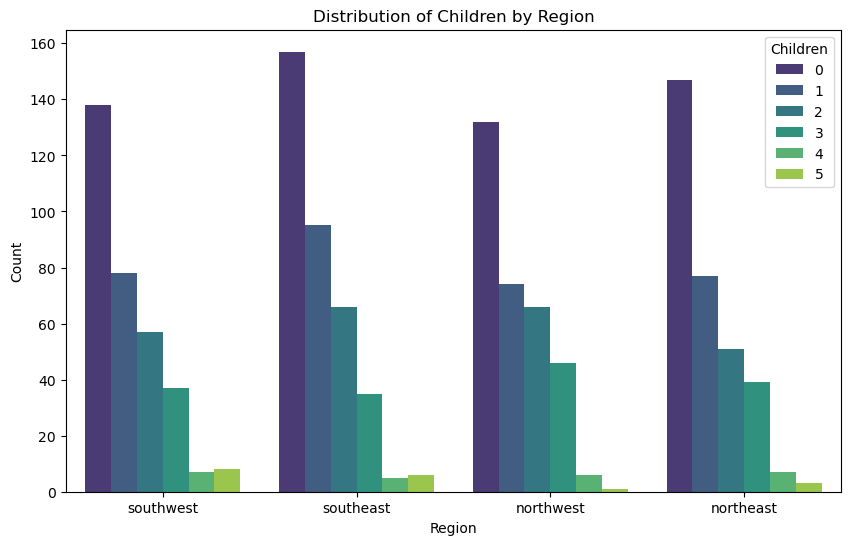

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='children', palette='viridis')
plt.title('Distribution of Children by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Children')
plt.show()

## BMI and Age

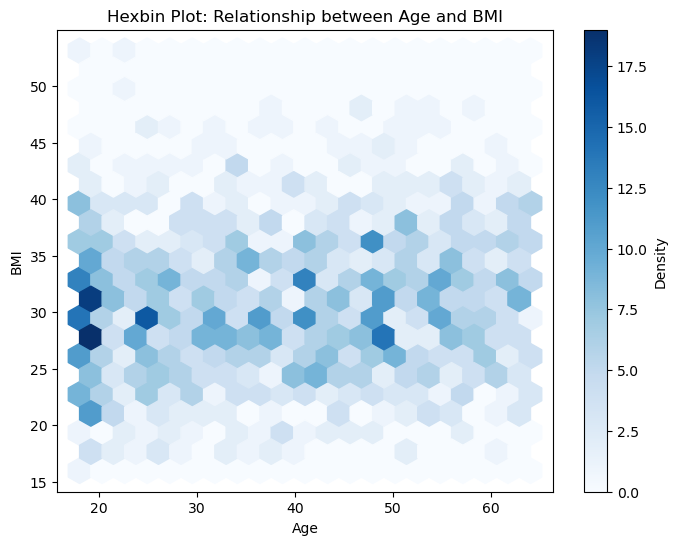

In [59]:
plt.figure(figsize=(8, 6))
plt.hexbin(x=df['age'], y=df['bmi'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot: Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.colorbar(label='Density')
plt.show()

Obezitenin geç yaşlarda daha çok görüldüğünü söyleyebiliriz.

## BMI and Children

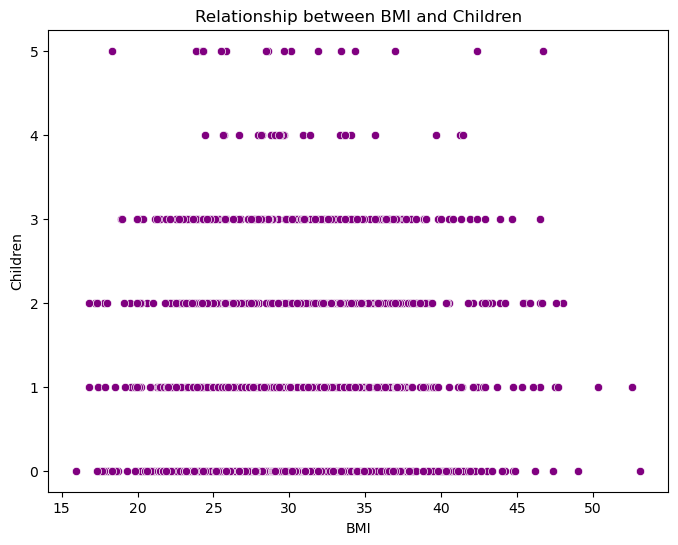

In [62]:
# Relationship between “bmi” and “children”.

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='children', color='purple')
plt.title('Relationship between BMI and Children')
plt.xlabel('BMI')
plt.ylabel('Children')
plt.show()

## Outlier BMI

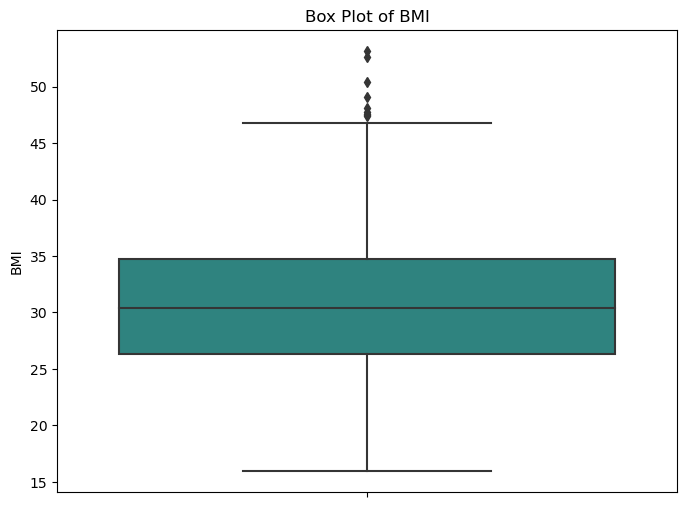

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='bmi', palette='viridis')
plt.title('Box Plot of BMI')
plt.ylabel('BMI')
plt.show()

## BMI and Charges

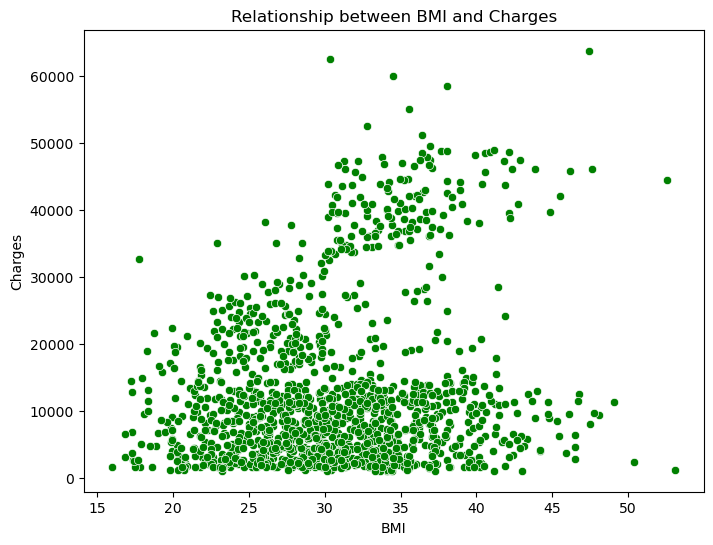

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges', color='green')
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

## Region, Smoker and BMI

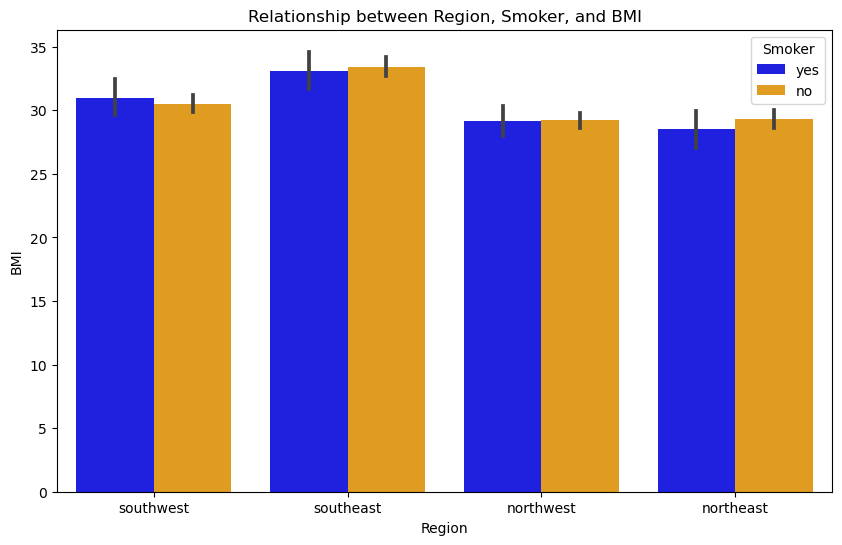

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region', y='bmi', hue='smoker', palette=['blue', 'orange'])
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.legend(title='Smoker')
plt.show()

# Data Preprocessing

In [73]:
# Separate features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

In [74]:
# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['smoker'] = label_encoder.fit_transform(X['smoker'])

In [75]:
# One-Hot Encoding for multi-class categorical variables
X = pd.get_dummies(X, columns=['region'], drop_first=True)

In [76]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Standard Scaling for normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection

In [97]:
# Create instances of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),  # Lasso Regression
    Ridge(alpha=1.0),  # Ridge Regression
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    SVR(kernel='linear'),
    SVR(kernel='rbf'),
    SVR(kernel='poly')
]

# Define a function for evaluation metrics
def evaluate_model(model, X, y):
    y_pred = cross_val_predict(model, X, y, cv=5)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae_val = mean_absolute_error(y, y_pred)
    mape_val = mean_absolute_percentage_error(y, y_pred)
    return rmse, mae_val, mape_val

# Evaluate and compare the performance of different models
for model in models:
    model_name = model.__class__.__name__
    rmse, mae, mape = evaluate_model(model, X_train_scaled, y_train)
    print(f'{model_name}:')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print('-' * 30)

LinearRegression:
RMSE: 6160.185958948655
MAE: 4245.2279476034555
MAPE: 0.4228484584471206
------------------------------
Lasso:
RMSE: 6160.175520746593
MAE: 4245.204075882369
MAPE: 0.42284404621572214
------------------------------
Ridge:
RMSE: 6160.043509243137
MAE: 4246.440722516583
MAPE: 0.42311676738119786
------------------------------
DecisionTreeRegressor:
RMSE: 6704.739898180603
MAE: 3278.0934828644863
MAPE: 0.3640146707506971
------------------------------
RandomForestRegressor:
RMSE: 4975.764002006126
MAE: 2774.9440419180955
MAPE: 0.3214787202966462
------------------------------
GradientBoostingRegressor:
RMSE: 4738.667224675976
MAE: 2667.9508559167575
MAPE: 0.3152432030322759
------------------------------
SVR:
RMSE: 12195.604619063588
MAE: 7871.819834324246
MAPE: 0.9227470582819568
------------------------------
SVR:
RMSE: 12583.5669753068
MAE: 8271.247921982316
MAPE: 1.018789160124641
------------------------------
SVR:
RMSE: 12574.623944117631
MAE: 8269.284923397334
MAP

# Model Optimization

In [101]:
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    SVR(),
]

# Define hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'Lasso': {'alpha': [0.1, 0.5, 1.0]},
    'Ridge': {'alpha': [0.1, 0.5, 1.0]},
    'DecisionTreeRegressor': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'RandomForestRegressor': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'GradientBoostingRegressor': {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]},
    'SVR': {'C': [1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']},
}

# Loop through each model and perform hyperparameter optimization
for model in models:
    model_name = model.__class__.__name__
    param_grid = param_grids[model_name] if model_name in param_grids else {}
    
    # Create GridSearchCV instance
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    
    # Fit the model with hyperparameter optimization
    grid_search.fit(X_train_scaled, y_train)
    
    # Print the best hyperparameters and RMSE score
    print(f"Model: {model_name}")
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best RMSE:", np.sqrt(-grid_search.best_score_))
    print("=" * 50)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Model: LinearRegression
Best Hyperparameters: {}
Best RMSE: 6160.185958948655
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: Lasso
Best Hyperparameters: {'alpha': 1.0}
Best RMSE: 6160.082851292467
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: Ridge
Best Hyperparameters: {'alpha': 1.0}
Best RMSE: 6160.043509243137
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: DecisionTreeRegressor
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10}
Best RMSE: 5677.54143922327
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: RandomForestRegressor
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 300}
Best RMSE: 4936.408814679204
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: GradientBoostingRegressor
Best Hyperparameters: {'max_depth': 3, 'n_estimators': 100}
Best RMSE: 4738.667224675976
Fitting 5 folds for each of 9 candidates, 

# Model Evaluation

In [105]:
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42),
    RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42),
    SVR(C=100, kernel='linear'),
]

best_rmse = float('inf')
best_mae = float('inf')
best_mape = float('inf')
best_r2 = -float('inf')
best_model_name = ''

# Loop through each model and evaluate using different metrics
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    model_name = model.__class__.__name__
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_mae = mae
        best_mape = mape
        best_r2 = r2
        best_model_name = model_name
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Absolute Percentage Error: {mape}")
    print(f"R-squared (R2) Score: {r2}")
    print("=" * 50)

# Colorize the best model's name in the output
color_dict = {
    'LinearRegression': '\033[94m',   # Blue
    'Lasso': '\033[92m',              # Green
    'Ridge': '\033[93m',              # Yellow
    'DecisionTreeRegressor': '\033[91m',  # Red
    'RandomForestRegressor': '\033[95m',  # Magenta
    'GradientBoostingRegressor': '\033[96m',  # Cyan
    'SVR': '\033[90m',                # Gray
}

print(f"The Best Model is: {color_dict.get(best_model_name, '')}{best_model_name}\033[0m")
print(f"Best RMSE: {best_rmse}")
print(f"Best MAE: {best_mae}")
print(f"Best MAPE: {best_mape}")
print(f"Best R2: {best_r2}")

Model: LinearRegression
Mean Squared Error: 33596915.85136147
Root Mean Squared Error: 5796.2846592762735
Mean Absolute Error: 4181.194473753649
Mean Absolute Percentage Error: 0.468882559791469
R-squared (R2) Score: 0.7835929767120723
Model: Lasso
Mean Squared Error: 33597337.55947545
Root Mean Squared Error: 5796.3210366124
Mean Absolute Error: 4181.2260517367295
Mean Absolute Percentage Error: 0.4688984964422354
R-squared (R2) Score: 0.7835902603735236
Model: Ridge
Mean Squared Error: 33604973.53996333
Root Mean Squared Error: 5796.979691180859
Mean Absolute Error: 4182.796596583273
Mean Absolute Percentage Error: 0.46929602590796843
R-squared (R2) Score: 0.7835410749121385
Model: DecisionTreeRegressor
Mean Squared Error: 34295555.03299668
Root Mean Squared Error: 5856.240691176949
Mean Absolute Error: 3056.0955553163317
Mean Absolute Percentage Error: 0.37660820441739623
R-squared (R2) Score: 0.7790928485955844
Model: RandomForestRegressor
Mean Squared Error: 20760182.25914627
Root

# Search Overfitting and Underfitting

In [106]:
# Loop through each model and evaluate using different metrics
for model in models:
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    model_name = model.__class__.__name__
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_mae = test_mae
        best_mape = test_mape
        best_r2 = test_r2
        best_model_name = model_name
    
    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse} | Test RMSE: {test_rmse}")
    print(f"Train MAE: {train_mae} | Test MAE: {test_mae}")
    print(f"Train R2: {train_r2} | Test R2: {test_r2}")
    print("=" * 50)

Model: LinearRegression
Train RMSE: 6105.545160099847 | Test RMSE: 5796.2846592762735
Train MAE: 4208.234572492223 | Test MAE: 4181.194473753649
Train R2: 0.7417255854683333 | Test R2: 0.7835929767120723
Model: Lasso
Train RMSE: 6105.54517271261 | Test RMSE: 5796.3210366124
Train MAE: 4208.225056655 | Test MAE: 4181.2260517367295
Train R2: 0.7417255844012529 | Test R2: 0.7835902603735236
Model: Ridge
Train RMSE: 6105.553248374978 | Test RMSE: 5796.979691180859
Train MAE: 4209.389236376438 | Test MAE: 4182.796596583273
Train R2: 0.7417249011736953 | Test R2: 0.7835410749121385
Model: DecisionTreeRegressor
Train RMSE: 3112.9318574135596 | Test RMSE: 5856.240691176949
Train MAE: 1535.205411888999 | Test MAE: 3056.0955553163317
Train R2: 0.932861487024911 | Test R2: 0.7790928485955844
Model: RandomForestRegressor
Train RMSE: 2258.4916805390835 | Test RMSE: 4556.334300635355
Train MAE: 1257.0858681989116 | Test MAE: 2519.5757270301015
Train R2: 0.9646597611648183 | Test R2: 0.86627792665573